In [2]:
import cv2

In [3]:
img = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)

# threshold to binary
thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# find contours - write black over all small contours
letter = morph.copy()
cntrs = cv2.findContours(morph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]
for c in cntrs:
    area = cv2.contourArea(c)
    if area < 100:
        cv2.drawContours(letter,[c],0,(0,0,0),-1)

# do canny edge detection
edges = cv2.Canny(letter, 200, 200)

# write results
cv2.imwrite("K_thresh.png", thresh)
cv2.imwrite("K_morph.png", morph)
cv2.imwrite("K_letter.png", letter)
cv2.imwrite("K_edges.png", edges)

# show results
cv2.imshow("K_thresh", thresh)
cv2.imshow("K_morph", morph)
cv2.imshow("K_letter", letter)
cv2.imshow("K_edges", edges)
# cv2.waitKey(0)

[ WARN:0@7.299] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('WhatsApp Image 2022-11-23 at 2.57.04 PM.jpeg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/morph.dispatch.cpp:1163: error: (-215:Assertion failed) !_src.empty() in function 'morphologyEx'


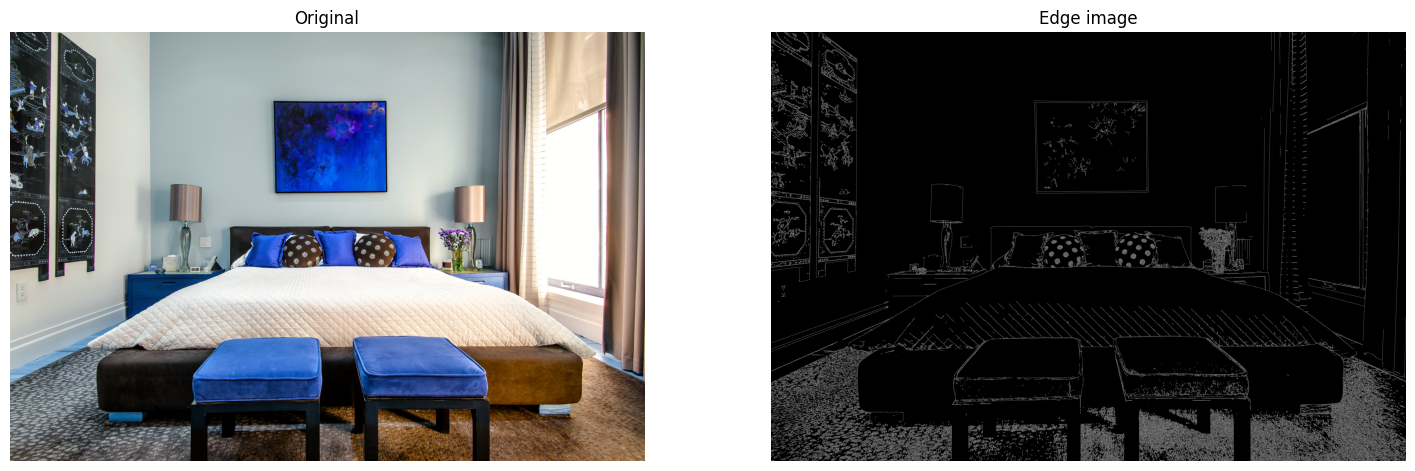

In [14]:
import matplotlib.pyplot as plt
img = cv2.imread('pic.jpg')

edges = cv2.Canny(image=img, threshold1=400, threshold2=200)
 
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img)
plt.title('Original') 
plt.axis("off")
 
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge image')
plt.axis("off")
plt.show()

In [15]:
img[:][:][0] =  min(img[:][:][0]+edges)

ValueError: operands could not be broadcast together with shapes (4708,3) (3187,4708) 

In [9]:
edges.shape

(960, 1280)

In [16]:
img[:][:][0].shape

(1280, 3)

In [17]:
img[:, :, 0].shape

(960, 1280)

In [22]:
img[:,:,0] = img[:,:,0]+edges
img[:,:,1] = img[:,:,1]+edges
img[:,:,2] = img[:,:,2]+edges

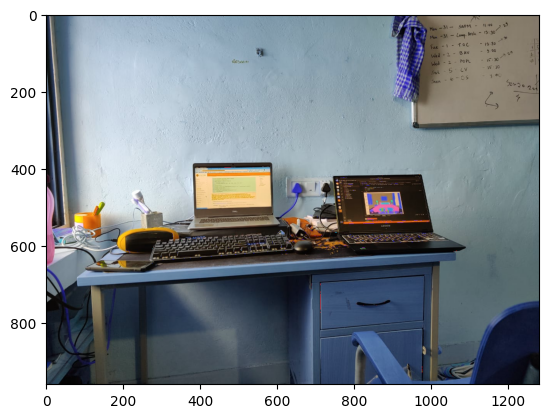

In [23]:
plt.imshow(img)

In [27]:
cv2.imwrite('test.jpg',img)

True

In [5]:
import numpy as np

kernel = np.ones((5, 5), np.uint8)

# img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(edges, kernel, iterations=1)

# cv2.imshow("Dilate", img_dilation)

In [12]:
arr = np.ones(img_dilation.shape) * 255
img[:,:,0] = np.minimum(img[:,:,0]+img_dilation, arr)
img[:,:,1] = np.minimum(img[:,:,1]+img_dilation, arr)
img[:,:,2] = np.minimum(img[:,:,2]+img_dilation, arr)

In [13]:
cv2.imwrite('test.jpg',img)

True

In [8]:
arr = np.ones(img_dilation.shape) * 255

In [9]:
arr

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [18]:
pic = cv2.imread('1.jpeg')

cv2.imshow('1.jpeg', pic)

cv2.waitKey(0)

27

: 